In [1]:
!pip install -q kaggle

In [2]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d rajyellow46/wine-quality

  0% 0.00/98.0k [00:00<?, ?B/s]
100% 98.0k/98.0k [00:00<00:00, 63.0MB/s]


In [4]:
!ls

kaggle.json  sample_data  wine-quality.zip


In [5]:
!unzip wine-quality.zip

Archive:  wine-quality.zip
  inflating: winequalityN.csv        


In [6]:
import pandas as pd

df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
df=df.dropna()

In [8]:
df['type'].unique()

array(['white', 'red'], dtype=object)

In [9]:
df=pd.get_dummies(df,columns=['type'],drop_first=True)

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


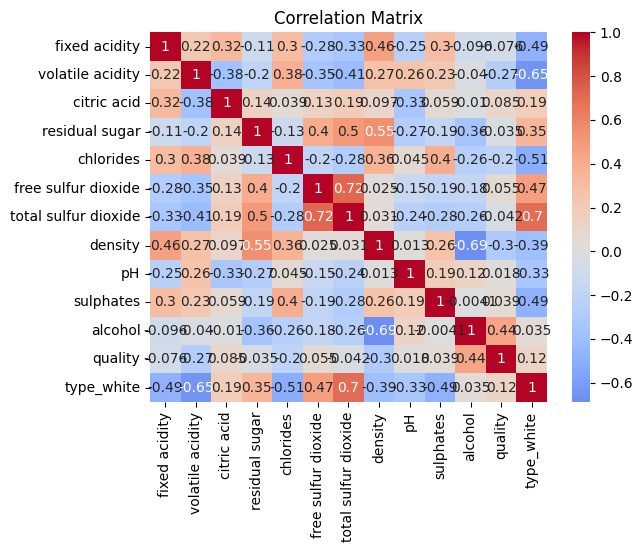

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Create a heatmap plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)

# Customize plot
plt.title("Correlation Matrix")
plt.show()

In [12]:
y = df['quality']
df.drop(['quality'],axis=1,inplace=True)
X = df
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn. metrics import classification_report
model_2 = RandomForestClassifier()
model_2.fit(X_train,y_train)
pred_2 = model_2.predict(X_test)
print(classification_report(y_test,pred_2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       1.00      0.13      0.23        39
           5       0.70      0.74      0.72       416
           6       0.65      0.76      0.70       588
           7       0.73      0.50      0.59       216
           8       1.00      0.30      0.46        27

    accuracy                           0.68      1293
   macro avg       0.68      0.40      0.45      1293
weighted avg       0.69      0.68      0.67      1293



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn. metrics import classification_report
model3 = DecisionTreeClassifier()
baglfy = BaggingClassifier(base_estimator=model3)
baglfy.fit(X_train,y_train)
pred_3 = baglfy.predict(X_test)
print(classification_report(y_test,pred_3))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.38      0.15      0.22        39
           5       0.64      0.73      0.68       416
           6       0.64      0.69      0.66       588
           7       0.65      0.47      0.54       216
           8       0.69      0.33      0.45        27

    accuracy                           0.64      1293
   macro avg       0.50      0.40      0.43      1293
weighted avg       0.63      0.64      0.63      1293



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
estimators = [
    ('rf',RandomForestClassifier()),
    ('dt',DecisionTreeClassifier()),
    ('ls',LinearSVC())
]

clf = StackingClassifier(estimators=estimators)
clf.fit(X_train, y_train)
pred_4= clf.predict(X_test)
print(classification_report(y_test,pred_4))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.38      0.13      0.19        39
           5       0.71      0.73      0.72       416
           6       0.66      0.78      0.71       588
           7       0.70      0.49      0.58       216
           8       0.64      0.33      0.44        27

    accuracy                           0.68      1293
   macro avg       0.52      0.41      0.44      1293
weighted avg       0.67      0.68      0.67      1293



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5)

pca_result = pca.fit_transform(X_scaled)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(pca_result, y,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [19]:
model_2 = RandomForestClassifier()
model_2.fit(X_train,y_train)
pred_2 = model_2.predict(X_test)
print(classification_report(y_test,pred_2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.67      0.15      0.25        39
           5       0.67      0.75      0.71       416
           6       0.64      0.70      0.67       588
           7       0.60      0.45      0.51       216
           8       0.82      0.33      0.47        27

    accuracy                           0.65      1293
   macro avg       0.57      0.40      0.44      1293
weighted avg       0.64      0.65      0.63      1293



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


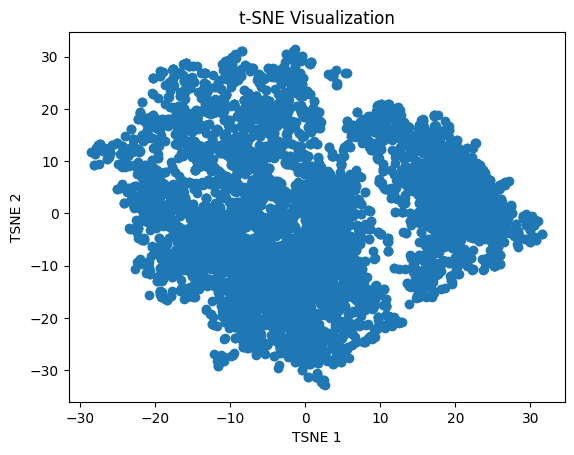

In [20]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Create a t-SNE object
tsne = TSNE(n_components=3)

# Apply t-SNE to the dataframe
tsne_results = tsne.fit_transform(X_scaled)

# Plot the t-SNE results
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('t-SNE Visualization')
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(tsne_results, y,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [22]:
model_2 = RandomForestClassifier()
model_2.fit(X_train,y_train)
pred_2 = model_2.predict(X_test)
print(classification_report(y_test,pred_2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.32      0.21      0.25        39
           5       0.65      0.75      0.70       416
           6       0.66      0.64      0.65       588
           7       0.62      0.54      0.58       216
           8       0.47      0.33      0.39        27
           9       0.00      0.00      0.00         0

    accuracy                           0.64      1293
   macro avg       0.39      0.35      0.37      1293
weighted avg       0.63      0.64      0.63      1293



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
